# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

# Preliminaries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
df = pd.read_csv('product_sales.csv')
df

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
...,...,...,...,...,...,...,...,...
942,943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,NaN
943,944,NaN,NaN,NaN,NaN,Potato,2,High
944,945,951.74,29.42,3.57,13.87,Pork,2,High
945,946,266.61,35.77,0.97,8.07,Potato,6,High


# Data Validation

All columns have the correct datatypes

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


Only the _revenue_ column has missing values, in which the missing values consists of 7.16% of the whole dataset.

In [3]:
df['revenue'].isna().mean()*100

7.16

The column _sales_method_ has duplicate categories.

In [4]:
for column in df.columns:
    print(column, df[column].unique())

week [2 6 5 4 3 1]
sales_method ['Email' 'Email + Call' 'Call' 'em + call' 'email']
customer_id ['2e72d641-95ac-497b-bbf8-4861764a7097'
 '3998a98d-70f5-44f7-942e-789bb8ad2fe7'
 'd1de9884-8059-4065-b10f-86eef57e4a44' ...
 '839653cb-68c9-48cb-a097-0a5a3b2b298b'
 'e4dad70a-b23b-407c-8bd3-e32ea00fae17'
 '4e077235-7c17-4054-9997-7a890336a214']
nb_sold [10 15 11  9 13  8 12  7 14 16]
revenue [   nan 225.47  52.55 ...  44.34  45.01  64.9 ]
years_as_customer [ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]
nb_site_visits [24 28 26 25 22 31 23 30 21 27 32 29 20 18 19 35 16 17 33 36 34 15 37 14
 13 12 41]
state ['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'A

There are 2 rows with _years_as_customer_ being older than the company, which is impossible.

In [5]:
df[df['years_as_customer']>(2025-1984)]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


To correct the data, we standardize the categories of _sales_method_ to ('Call', 'Email', 'Email + Call') and drop the outliers of _years_as_customer_. For the  _revenue_ column, we either impute, or drop the missing values. We will impute the mean if the data is normally distributed. To check for normality of the revenue distribution, we sort by _sales_method_ for uniformity in the plots.

In [6]:
clean_df = df.copy()
clean_df['sales_method'] = clean_df['sales_method'].replace(['em + call', 'email'], ['Email + Call', 'Email'])
clean_df = clean_df[clean_df['years_as_customer']<(2025-1984)].sort_values('sales_method')

A visual check shows that _Call_ and _Email_ shows a uniform distribution for each category, _Email + Call_ show 4 separate uniform distributions.

In [7]:
clean_df.groupby('sales_method').size()

sales_method
Call            4961
Email           7465
Email + Call    2572
dtype: int64

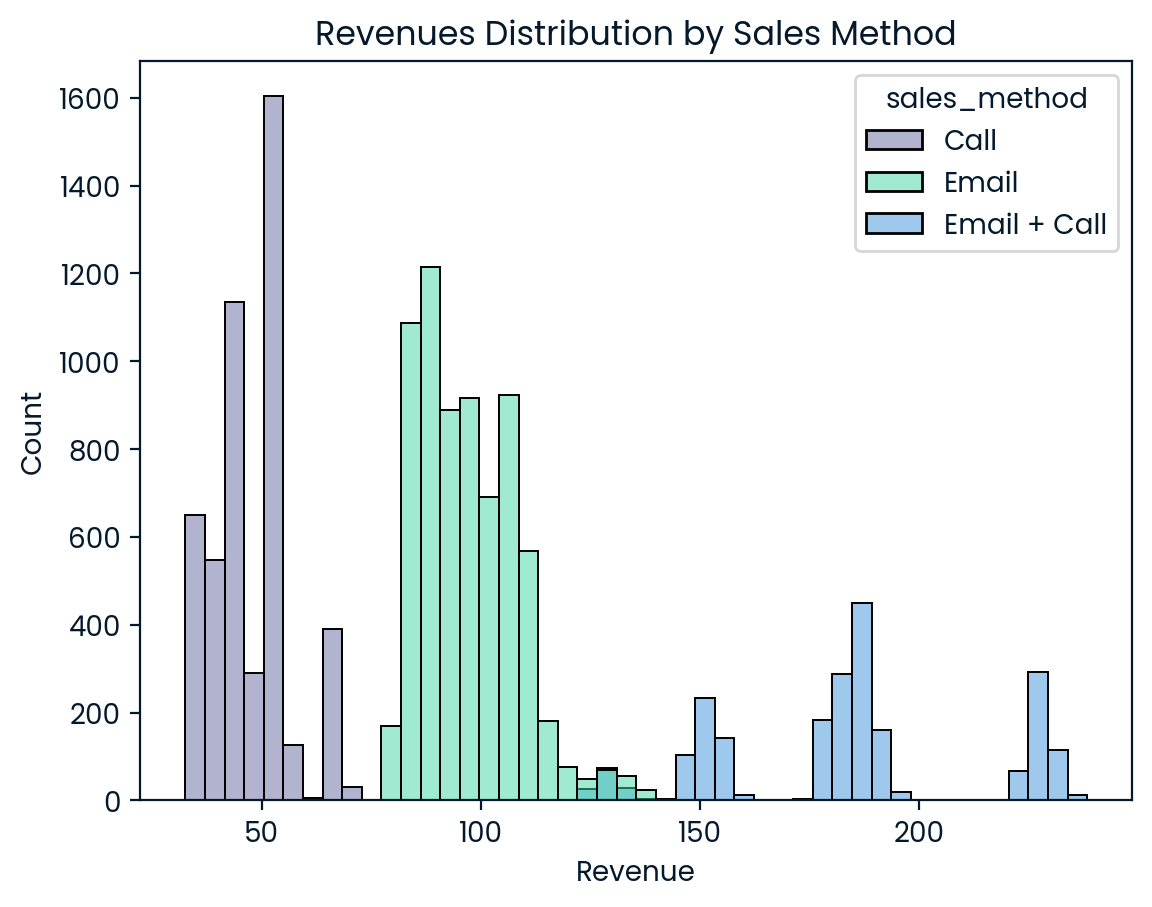

In [8]:
sns.histplot(clean_df.sort_values('sales_method'), x='revenue', hue='sales_method')
plt.title('Revenues Distribution by Sales Method')
plt.xlabel('Revenue')
plt.show()

Since one category is not uniformly distributed, we drop all missing values for uniformity

In [9]:
clean_df = clean_df.dropna()

# Exploratory Analysis

We first check the number of customers for each sales method.

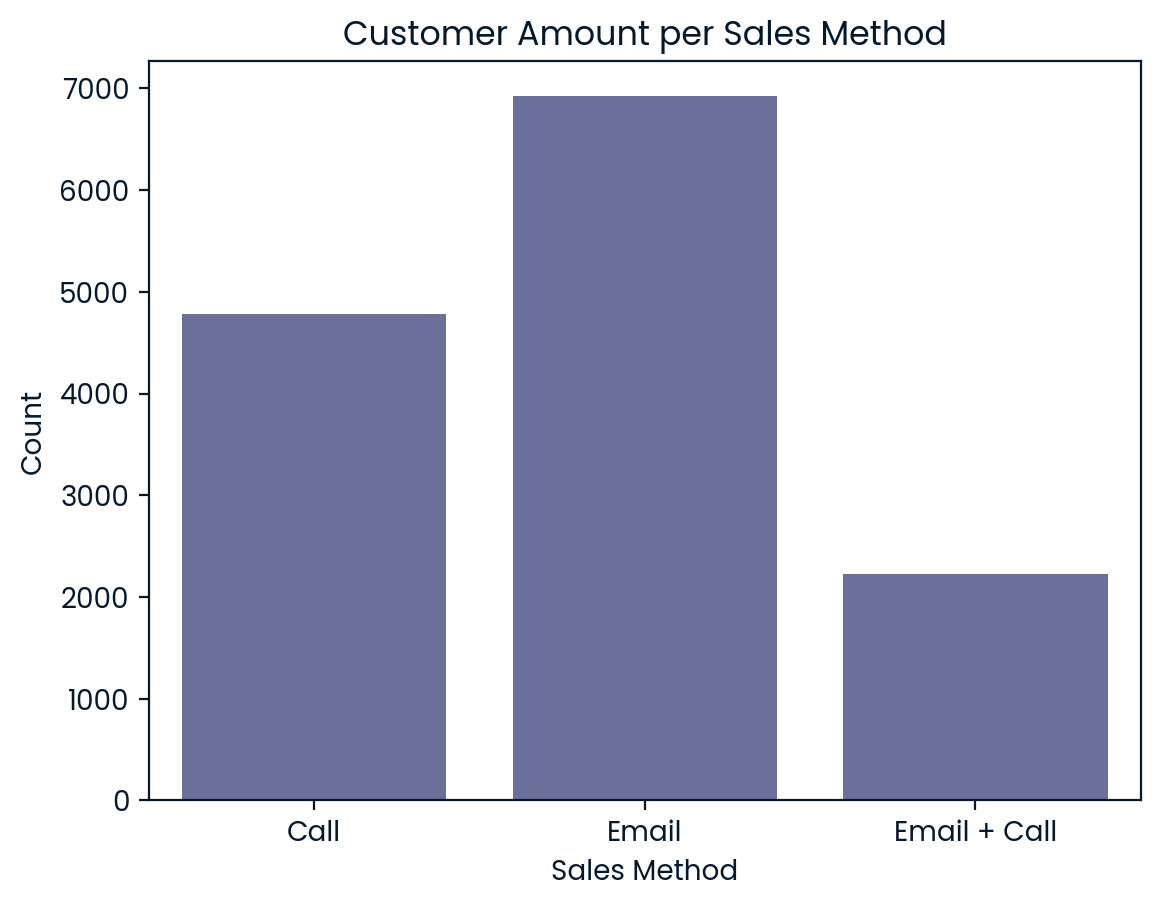

In [10]:
customers_per_method = clean_df['sales_method'].value_counts()
sns.countplot(clean_df, x='sales_method')
plt.title('Customer Amount per Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Count')
plt.show()

The quantity of samples for each sales method are uneven, so revenue should be analyzed in a per customer basis.

In [11]:
clean_df['revenue_per_customer'] = clean_df['revenue']/clean_df.groupby('sales_method')['sales_method'].transform('count')

In [12]:
clean_df['revenue_per_customer'] = clean_df.groupby('sales_method')['revenue'].transform('sum')/clean_df.groupby('sales_method')['sales_method'].transform('count')

In [13]:
clean_df

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,revenue_per_customer
11608,3,Call,e1539b27-3c82-4c4f-968e-c4592a253771,9,42.81,7,23,California,47.596866
11019,5,Call,490b5db5-c67b-4649-9def-a350aecaaa5a,11,54.01,7,25,Pennsylvania,47.596866
4833,1,Call,f015e397-1e5d-4631-ad41-0834beb23692,7,35.79,3,22,Ohio,47.596866
11024,5,Call,16e844bf-5273-46d9-a872-69d405f01a60,10,51.40,1,27,Wyoming,47.596866
4830,3,Call,038f7d19-691c-479b-85ef-ac9cc6699023,8,39.82,2,23,Oregon,47.596866
...,...,...,...,...,...,...,...,...,...
6420,1,Email + Call,af4d3edb-d16c-4c32-9e27-6c75108d232b,9,128.54,1,22,New York,183.651233
9753,6,Email + Call,a84a38fa-3f09-439f-b9b4-a235d7aa4716,15,225.25,3,26,Illinois,183.651233
12558,6,Email + Call,8992a41d-8400-456b-8683-54760e60e0cd,15,232.02,0,31,California,183.651233
2992,5,Email + Call,f5538852-2da4-4d1a-a155-b01aa4289a01,13,191.67,3,30,Florida,183.651233


We plot the total revenue per customer over time for each sales method.

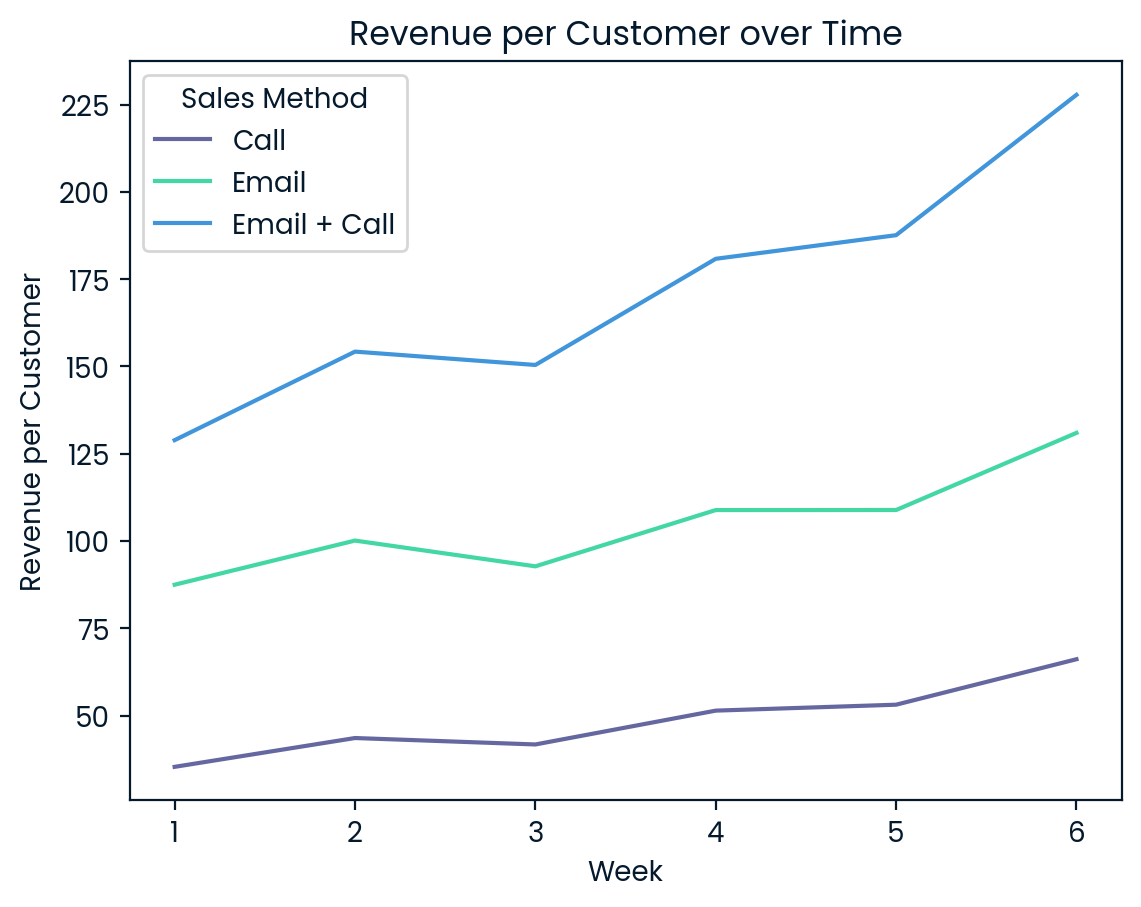

In [14]:
week_vs_sales_revenue = clean_df.groupby(['sales_method', 'week']).agg({
    'revenue': 'sum',
    'customer_id': 'count'
})
week_vs_sales_revenue['average_revenue_per_customer'] = week_vs_sales_revenue['revenue']/week_vs_sales_revenue['customer_id']
ax = sns.lineplot(
    week_vs_sales_revenue,
    x='week',
    y='average_revenue_per_customer',
    hue='sales_method'
)
plt.title('Revenue per Customer over Time')
plt.xlabel('Week')
plt.ylabel('Revenue per Customer')
ax.legend(title='Sales Method')
plt.show()

# Metric Definition

If manpower and ability to do calls is not an issue or a limiting factor, **Revenue Per Customer** is a sufficient metric. In that case, Email and Call should be the sales method used. But if the amount of sales calls that can be done are limited, we can instead use **Revenue per Time of Effort (_NRTE_)**, which is defined as:

$$NRTE = \frac{\text{Net revenue of method}}{(\text{Customer amount of method})*(\text{Time to complete method})}$$

The time to complete each call were given, but the time for completing an email is unknown, this cannot be assumed as we do not know the process of sending the email, i.e. is it automated or personalized per customer? We set the time to send an email as $t$. This gives us the total time to complete each sales method as the following:
- Call - $2t$
- Email - $30$
- Email + Call - $10+t$

This gives us a metric _NRTE_ that depends on the average time to send an email.

In [15]:
net_revenue_per_method = clean_df.groupby('sales_method')['revenue'].agg('sum').values
customer_amount_per_method = clean_df.groupby('sales_method')['sales_method'].agg('count').values
ratio_per_method = net_revenue_per_method/customer_amount_per_method

In [16]:
def net_revenue_per_customer_per_time_effort(t):
    output = []
    method_time = np.array([np.full_like(t, 30), 2*t,10+t])
    for ratio, time in zip(ratio_per_method, method_time):
        output.append(ratio/time)
    return pd.DataFrame(np.array(output).T, index=t, columns=['Call', 'Email', 'Email+Call'])

def melt_dataframe(df):
    return df.reset_index().melt(id_vars=['index'], value_vars=['Call', 'Email', 'Email+Call'], var_name='sales_method', value_name = 'metric')


Plotting _NRTE_ for varying email time, we get that for quick email times, email gives the highest NRTE. And when the email time gets high enough, email + call seems to give the higher _NRTE_

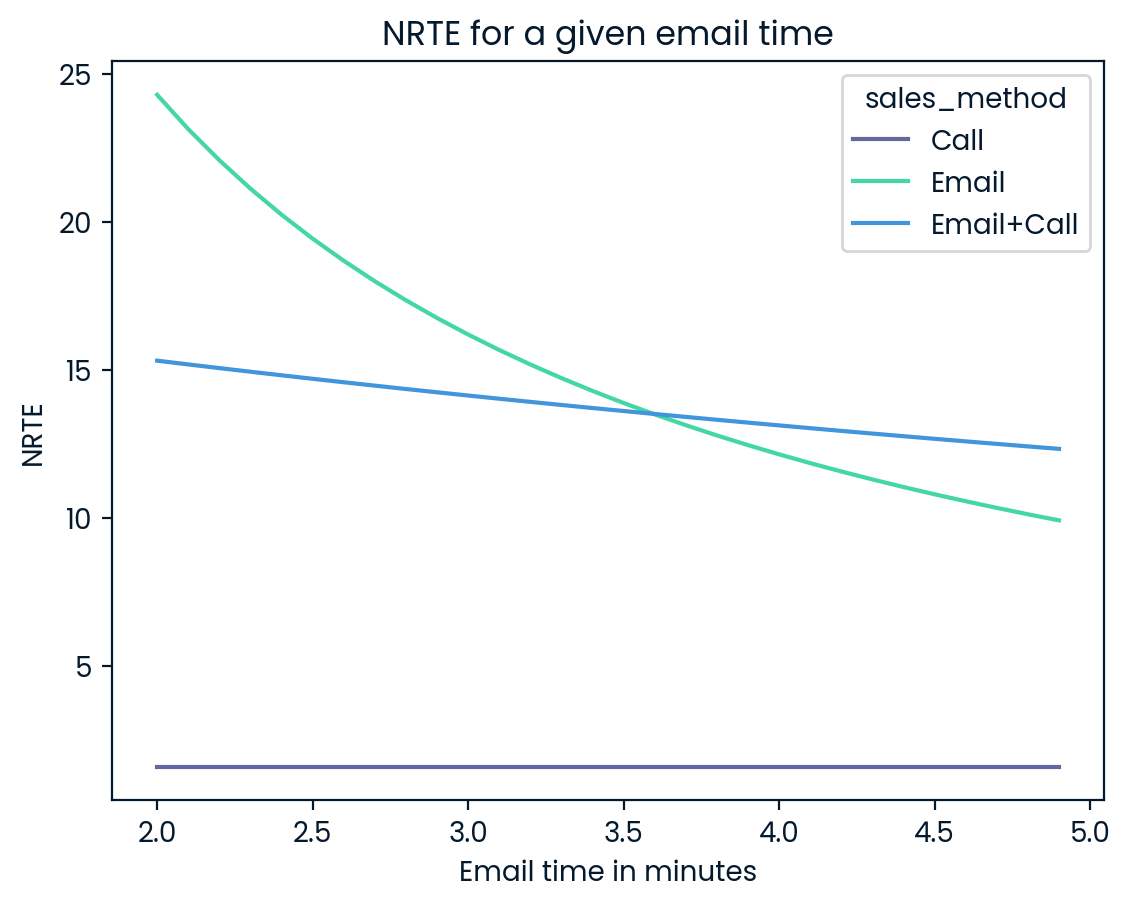

In [17]:
sns.lineplot(
    melt_dataframe(net_revenue_per_customer_per_time_effort(np.arange(2, 5, 0.1))),
    x='index',
    y='metric',
    hue='sales_method'
)
plt.title('NRTE for a given email time')
plt.xlabel('Email time in minutes')
plt.ylabel('NRTE')
ax.legend(title='Sales Method')
plt.show()

To find the critical email time where email + call gives a higher _NRTE_ than email only, we find the intersection of these curves using

$$NRTE_\text{call}(t)=NRTE_\text{email+call}(t)$$

Which can be solved algebraically, then calculated below

In [18]:
_, ratio_email, ratio_email_plus_call = ratio_per_method
critical_time = (10/(2*(ratio_email_plus_call/ratio_email)-1))
print(f'{int(np.floor(critical_time))} minutes and {round(60*critical_time%60)} seconds')

3 minutes and 36 seconds


If the average time to send one email is less than 3 minutes and 36 seconds, a second email is preferred over a call. But above that time, Email + Call is preferred. There is a range of email time values where calls only give the highest _NRTE_, but the email time for this is unrealistic.

# Conclusions and Recommendations #
For the company's new product line, the sales team used 3 methods to advertise. Data was collected for each customer, of note are _revenue_, _sales method_, and _week_. _Revenue_ is the total net sales from the purchases of the customer. _Sales method_ consists of 3 categories, a call from the sales team, and the other 2 starting with an email on the product launch, and either a call a week later, or another email 3 weeks later. Finally, _Week_ is the number of weeks between the product launch, and when the purchase was made.

The amount of customers for each sales method are not equal, so analysis was done using the average revenue per customer. We are able to conclude the following:
- The sales method that generated the highest amount of revenue per customer is _Email + Call_. If manpower is sufficient enough to make calls for all customers, this method is preferred.
- If the amount of calls that can be done is limited, instead of revenue per customer, we consider **Net Revenue per Time of Effort (_NRTE_)**. Which also considers the amount of time that calls and emails take.
- Unlike for calls, the average time it takes for an email is not given. So we consider the critical email time in using _NRTE_. We find that if the time it takes to generate and send an email is less than 3 minutes and 36 seconds, _Email_ only has the highest _NRTE_ out of the 3 methods, but above that, _Email + Call_ has the highest _NRTE_.

With these conclusions, we recommend the following:
- For future data measurements, measure an average time it takes to generate and send a sales email. Also consider having an uniform number of customers for each sales method if this study is to be done again.
- To maximize revenue per customer, use a combination of _Email_ only and _Email + Call_, using the latter as much as possible, but defaulting to email only if there's not enough manpower to call more potential customers.